In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 반복문을 이용한 시각화

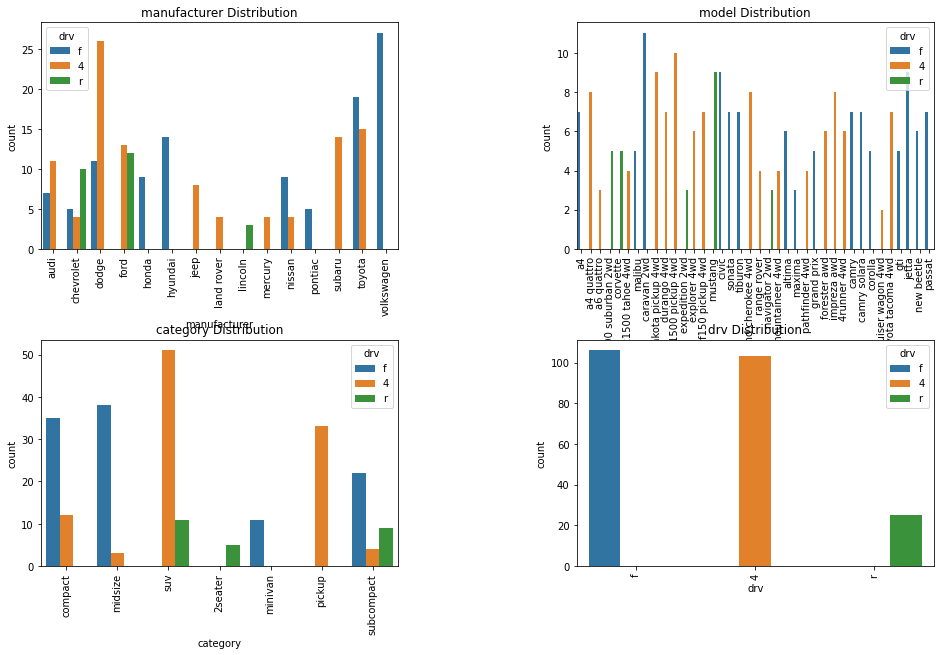

In [7]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(2,2)
# 2x2 -> 4개의 그래프
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace=0.4)
# 그래프가 여러 개 그려질 경우 충돌 방지

mpg_features = ['manufacturer','model','category','drv']
# 범주형 변수들만 모은 문자열 데이터

for idx, feature in enumerate(mpg_features):
    ax = plt.subplot(grid[idx])
    #sns 카운트플랏 파라미터들
    sns.countplot(x = feature,
                 data= df,
                 hue = 'drv',
                 ax =ax)
    plt.xticks(rotation=90) # x축의 값을 축전환하는 코드
    ax.set_title(f'{feature} Distribution')

# Seaborn 시각화 그래프

### 1. sns.hisplot

In [9]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='age', ylabel='Count'>

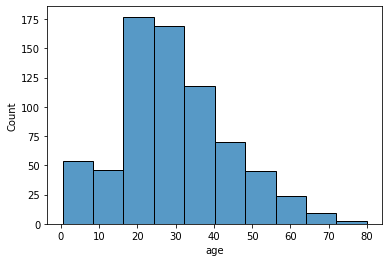

In [15]:
sns.histplot(df['age'], bins = 10)

<AxesSubplot:xlabel='age', ylabel='Count'>

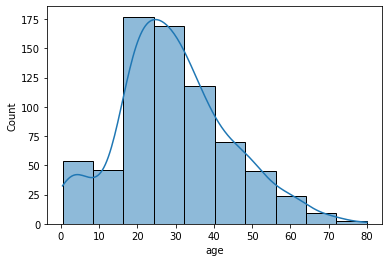

In [17]:
sns.histplot(df['age'], bins = 10, kde = True)
# 연속확률분포 그래프

### 2. sns.barplot

<AxesSubplot:xlabel='embarked', ylabel='count'>

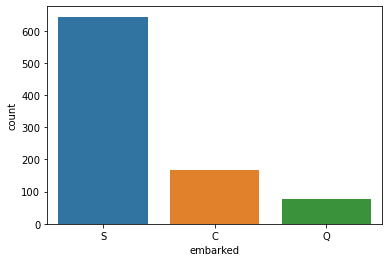

In [20]:
# count 함수를 이용한 그래프 그리기
sns.countplot(x = 'embarked', data = df)

<AxesSubplot:xlabel='embarked', ylabel='survived'>

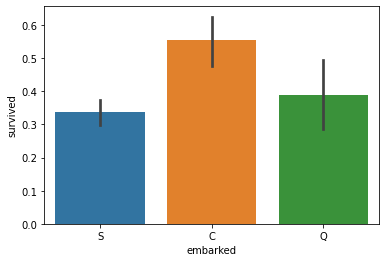

In [21]:
# count로 x, y축 지정 가능
sns.barplot(x = 'embarked', y = 'survived', data = df)

<AxesSubplot:xlabel='pclass', ylabel='sex'>

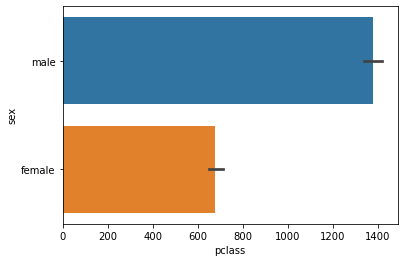

In [27]:
# y축이 범주형 변수면 그래프가 반전됨
# estimator sum으로 지정
sns.barplot(x = 'pclass', y = 'sex', data = df, estimator = sum)

<AxesSubplot:xlabel='embarked', ylabel='age'>

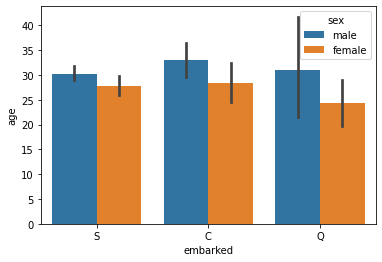

In [28]:
# hue 인자를 넣어 범례 추가
sns.barplot(x = 'embarked', y = 'age', hue = 'sex', data = df)

### 3. sns.boxplot

<AxesSubplot:xlabel='embarked', ylabel='age'>

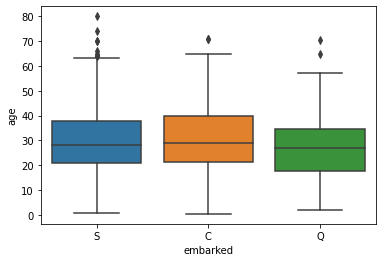

In [34]:
sns.boxplot(x = 'embarked', y = 'age', data = df)

<AxesSubplot:xlabel='pclass', ylabel='age'>

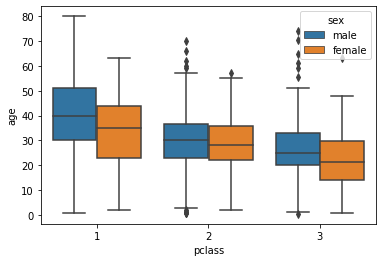

In [38]:
sns.boxplot(x = 'pclass', y = 'age', hue = 'sex', data = df)

### 4. sns.violinplot
- 연속확률분포 곡선을 대칭으로 그리고 가운데 박스플롯을 그리는 그래프

<AxesSubplot:xlabel='embarked', ylabel='age'>

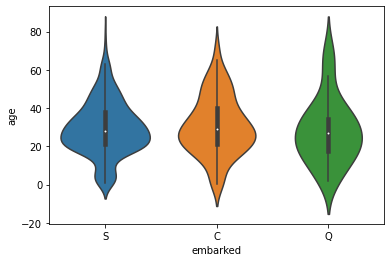

In [41]:
sns.violinplot(x = 'embarked', y = 'age', data = df)

<AxesSubplot:xlabel='embarked', ylabel='age'>

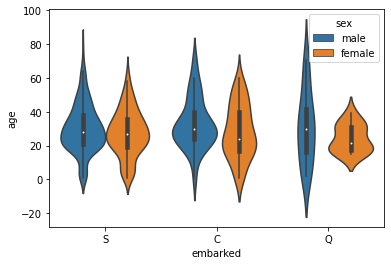

In [43]:
sns.violinplot(x = 'embarked', y = 'age', hue = 'sex', data = df)

- 다양한 시각화를 반복문으로 편하게 가능

idx 0
idx 1
idx 2


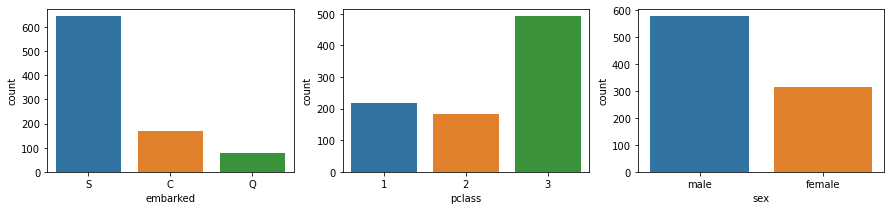

In [45]:
columns = ['embarked','pclass','sex']

fig, axs = plt.subplots(nrows =1, ncols = len(columns), figsize=(15,3))

for idx, columns in enumerate(columns):
    print('idx',idx)
    sns.countplot(x=columns, data=df, ax=axs[idx])

# 시계열데이터
- 시간의 흐름을 보여주는 인덱스 -> datetime을 이용해 시계열 데이터 확인 가능
- 시계열은 랜덤하게 나눌 수 없다
- Timestamp : 날짜와 시간을 모두 가지고 있으며 단일객체
- Timedelta : 객체를 가지고 있으며 시간의 연산이 가능

# 시계열 분석
- 고전적인 시계열 분석 : AR, MA, ARIMA, SARIMA
- 보간법으로 바로 진행하는 것들
- tensorflow에서 제공하는 시계열 분석 패키지
- DL LSTM, RNN 등

In [46]:
import pandas as pd 
import datetime 

In [52]:
date = datetime.date(year = 2023, month = 11, day = 26)
time = datetime.time(hour = 23, minute = 29, second = 5, microsecond = 1234)
print(date)
print(time)

2023-11-26
23:29:05.001234


In [53]:
td = datetime.timedelta(days = 31)
td

datetime.timedelta(days=31)

In [54]:
print(date + td)

2023-12-27


### datetime 판다스에서 제공하는 메소드
- 다양한 날짜 표기법을 시계열 데이터로 인식

In [55]:
pd.to_datetime('2023-11-26')

Timestamp('2023-11-26 00:00:00')

In [81]:
eg_dt = pd.Series(['2023-11-26','2023/11/26','2023.11.26','26-11-2023','26/11/2023','2023-13-26','2023-11-32'])

In [82]:
pd.to_datetime(eg_dt, dayfirst = True, errors = 'coerce')
# 에러는 na값으로 변환

0   2023-11-26
1   2023-11-26
2   2023-11-26
3   2023-11-26
4   2023-11-26
5          NaT
6          NaT
dtype: datetime64[ns]

In [88]:
df = pd.read_csv('crime.csv')
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949182,39.756353,skyland,1,0


In [57]:
# 시계열 데이터 -> 시계열 데이터 타입으로 만들기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [89]:
# reported_date를 문자열로 인식하고 있으니 시계열로 바꿔야함
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

In [90]:
df = df.set_index('REPORTED_DATE')
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [92]:
# 원하는 날짜 추출하기
df.loc['2014-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-09-15 11:25:00,1216,traffic-accident,traffic-accident,-104.715414,39.835430,dia,0,1
2014-09-04 22:39:00,1229,drug-marijuana-possess,drug-alcohol,-104.987391,39.740059,civic-center,1,0
2014-09-05 16:45:00,1265,drug-methampetamine-possess,drug-alcohol,-105.015556,39.714645,valverde,1,0
2014-09-04 02:17:00,1348,criminal-trespassing,all-other-crimes,-104.987987,39.721292,baker,1,0
2014-09-02 00:48:00,1393,criminal-mischief-other,public-disorder,-105.036771,39.738809,west-colfax,1,0
...,...,...,...,...,...,...,...,...
2014-09-14 23:20:00,410763,assault-dv,other-crimes-against-persons,-104.979477,39.715978,speer,1,0
2014-09-29 11:04:00,419326,fraud-identity-theft,white-collar-crime,-105.034558,39.705673,westwood,1,0
2014-09-06 16:29:00,430458,theft-bicycle,larceny,-104.987656,39.696018,overland,1,0


In [93]:
df.loc['2015-08-30']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-08-30 21:13:00,1586,public-order-crimes-other,all-other-crimes,-104.982185,39.736816,capitol-hill,1,0
2015-08-30 00:59:00,1691,criminal-trespassing,all-other-crimes,-104.991308,39.744315,cbd,1,0
2015-08-30 21:59:00,2666,theft-items-from-vehicle,theft-from-motor-vehicle,-104.956161,39.691711,cory-merrill,1,0
2015-08-30 02:46:00,3841,traffic-accident-hit-and-run,traffic-accident,-105.027507,39.729317,villa-park,0,1
2015-08-30 00:17:00,3907,public-order-crimes-other,all-other-crimes,-105.043946,39.783175,berkeley,1,0
...,...,...,...,...,...,...,...,...
2015-08-30 19:36:00,304981,traffic-accident-hit-and-run,traffic-accident,-104.987092,39.701714,washington-park-west,0,1
2015-08-30 11:36:00,305013,drug-poss-paraphernalia,drug-alcohol,-104.897559,39.740158,east-colfax,1,0
2015-08-30 00:32:00,344273,weapon-poss-illegal-dangerous,all-other-crimes,-105.046000,39.697303,westwood,1,0


In [95]:
df.loc['Jan 2017']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-01-15 00:46:00,11473,theft-other,larceny,-104.976756,39.762913,five-points,1,0
2017-01-27 19:20:00,11837,assault-dv,other-crimes-against-persons,-104.966331,39.745437,city-park-west,1,0
2017-01-23 05:12:00,11882,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2017-01-05 20:03:00,13521,criminal-mischief-mtr-veh,public-disorder,-104.968347,39.777425,elyria-swansea,1,0
2017-01-14 14:32:00,13528,assault-dv,other-crimes-against-persons,-104.929743,39.764812,northeast-park-hill,1,0
...,...,...,...,...,...,...,...,...
2017-01-13 01:06:00,394421,assault-simple,other-crimes-against-persons,-104.925197,39.678463,goldsmith,1,0
2017-01-11 15:04:00,402156,criminal-mischief-mtr-veh,public-disorder,-104.864704,39.758337,stapleton,1,0
2017-01-14 17:29:00,403548,assault-dv,other-crimes-against-persons,-104.857357,39.659293,kennedy,1,0


In [96]:
df.loc['2015'].sort_index()
# 2015가 포함된 인덱스만 추출

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2015-01-01 00:43:00,280494,traffic-accident,traffic-accident,-104.995025,39.751087,union-station,0,1
2015-01-01 01:03:00,104638,assault-dv,other-crimes-against-persons,-104.874260,39.654472,hampden,1,0
2015-01-01 01:20:00,85618,threats-to-injure,public-disorder,-104.993289,39.754157,five-points,1,0
2015-01-01 01:20:00,240428,criminal-mischief-other,public-disorder,-104.993289,39.754157,five-points,1,0
2015-01-01 01:32:00,274526,criminal-trespassing,all-other-crimes,-104.994680,39.744222,cbd,1,0
...,...,...,...,...,...,...,...,...
2015-12-31 23:35:00,105199,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,195067,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,113467,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [97]:
df.between_time('17:00', '22:00')
# 5시와 10시 사이의 데이터 추출

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-03-12 19:52:00,14,burglary-residence-no-force,burglary,-104.929717,39.759760,north-park-hill,1,0
2012-02-27 19:28:00,18,burglary-residence-by-force,burglary,-104.911220,39.697516,washington-virginia-vale,1,0
2012-02-04 21:23:00,21,traffic-accident-hit-and-run,traffic-accident,-105.013966,39.740435,lincoln-park,0,1
2012-09-27 17:15:00,22,theft-other,larceny,-104.961986,39.678561,university,1,0
2013-04-03 19:59:00,24,traffic-accident,traffic-accident,-105.053241,39.758465,sloan-lake,0,1
...,...,...,...,...,...,...,...,...
2017-09-09 20:15:00,460898,aggravated-assault-dv,aggravated-assault,-105.030930,39.706092,westwood,1,0
2017-09-12 18:38:00,460899,traffic-accident,traffic-accident,-105.052178,39.654827,harvey-park-south,0,1
2017-09-12 17:47:00,460900,traffic-accident,traffic-accident,-104.912437,39.754714,north-park-hill,0,1


In [98]:
df.at_time('16:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-05-30 16:00:00,391,theft-items-from-vehicle,theft-from-motor-vehicle,-105.025414,39.689812,mar-lee,1,0
2013-12-29 16:00:00,575,liquor-possession,drug-alcohol,-105.024992,39.701706,athmar-park,1,0
2014-04-13 16:00:00,614,traffic-accident,traffic-accident,-105.006312,39.742729,auraria,0,1
2014-01-17 16:00:00,1730,drug-cocaine-possess,drug-alcohol,-104.926639,39.765977,northeast-park-hill,1,0
2013-10-26 16:00:00,2699,traffic-accident,traffic-accident,-104.940404,39.688629,virginia-village,0,1
...,...,...,...,...,...,...,...,...
2017-09-18 16:00:00,456691,violation-of-restraining-order,all-other-crimes,-104.996978,39.678669,overland,1,0
2017-08-25 16:00:00,457169,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.018232,39.714730,valverde,1,0
2017-09-19 16:00:00,457223,liquor-possession,drug-alcohol,-104.969712,39.740917,city-park-west,1,0


### 시계열 문법
- offsets, first 등 근로기준 날 추출, 첫주 월요일 추출 등 다양한 문법 사용 가능
- offsets, first : 원하는 특정 기준의 날짜들을 모두 추출할 수 있음

# resample 함수
- 간단하게 요약해주는 함수

In [100]:
df.resample('Y').sum()
# 해당 연도 별 행의 합 추출(groupby 개념)

,Unnamed: 0,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-12-31,12809857901,-5.934292e+06,2.246145e+06,37286,19786
2013-12-31,14600806248,-7.246151e+06,2.742824e+06,50698,18862
2014-12-31,15047442066,-8.801341e+06,3.331490e+06,62690,21763
2015-12-31,18188224240,-9.280214e+06,3.512745e+06,65894,23310
2016-12-31,27056187738,-9.480964e+06,3.588870e+06,67381,23744
2017-12-31,18516726312,-7.250241e+06,2.744495e+06,51902,17836


In [103]:
df[['IS_CRIME']].resample('M').mean()
# 행당 월 별 범죄 건수의 평균값

,IS_CRIME
REPORTED_DATE,
2012-01-31,0.628990
2012-02-29,0.591652
2012-03-31,0.652787
2012-04-30,0.658657
2012-05-31,0.645105
...,...
2017-05-31,0.730647
2017-06-30,0.742509
2017-07-31,0.747169
